# Intensity of Carbon Emissions in Ontario - Canada (2024) p/Hour

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('CA-ON_2024_hourly.csv')

display(df.head(20))
display(df.info())
display(df.describe())
display(df.nunique())

In [ ]:
df['Datetime (UTC)'] = pd.to_datetime(df['Datetime (UTC)'])
df_jan2024 = df[(df['Datetime (UTC)'].dt.year == 2024) & (df['Datetime (UTC)'].dt.month == 1)]
df_sorted = df_jan2024.sort_values(by='Carbon Intensity gCO₂eq/kWh (direct)', ascending=False)

display(df_sorted.head(20))

In [ ]:
df['Month'] = pd.to_datetime(df['Datetime (UTC)']).dt.month
df_grouped_by_month = df.groupby('Month', as_index=False)['Carbon Intensity gCO₂eq/kWh (direct)'].mean()
df_sorted = df_grouped_by_month.sort_values(by='Carbon Intensity gCO₂eq/kWh (direct)', ascending=False).reset_index(drop=True)

display(df_sorted)

carbon_intensity_general = np.array(df['Carbon Intensity gCO₂eq/kWh (direct)'])
carbon_intensity_grouped = np.array(df_sorted['Carbon Intensity gCO₂eq/kWh (direct)'])
carbon_intensity_general_mean = carbon_intensity_general.mean()
carbon_intensity_max = carbon_intensity_grouped.max()
carbon_intensity_min = carbon_intensity_grouped.min()

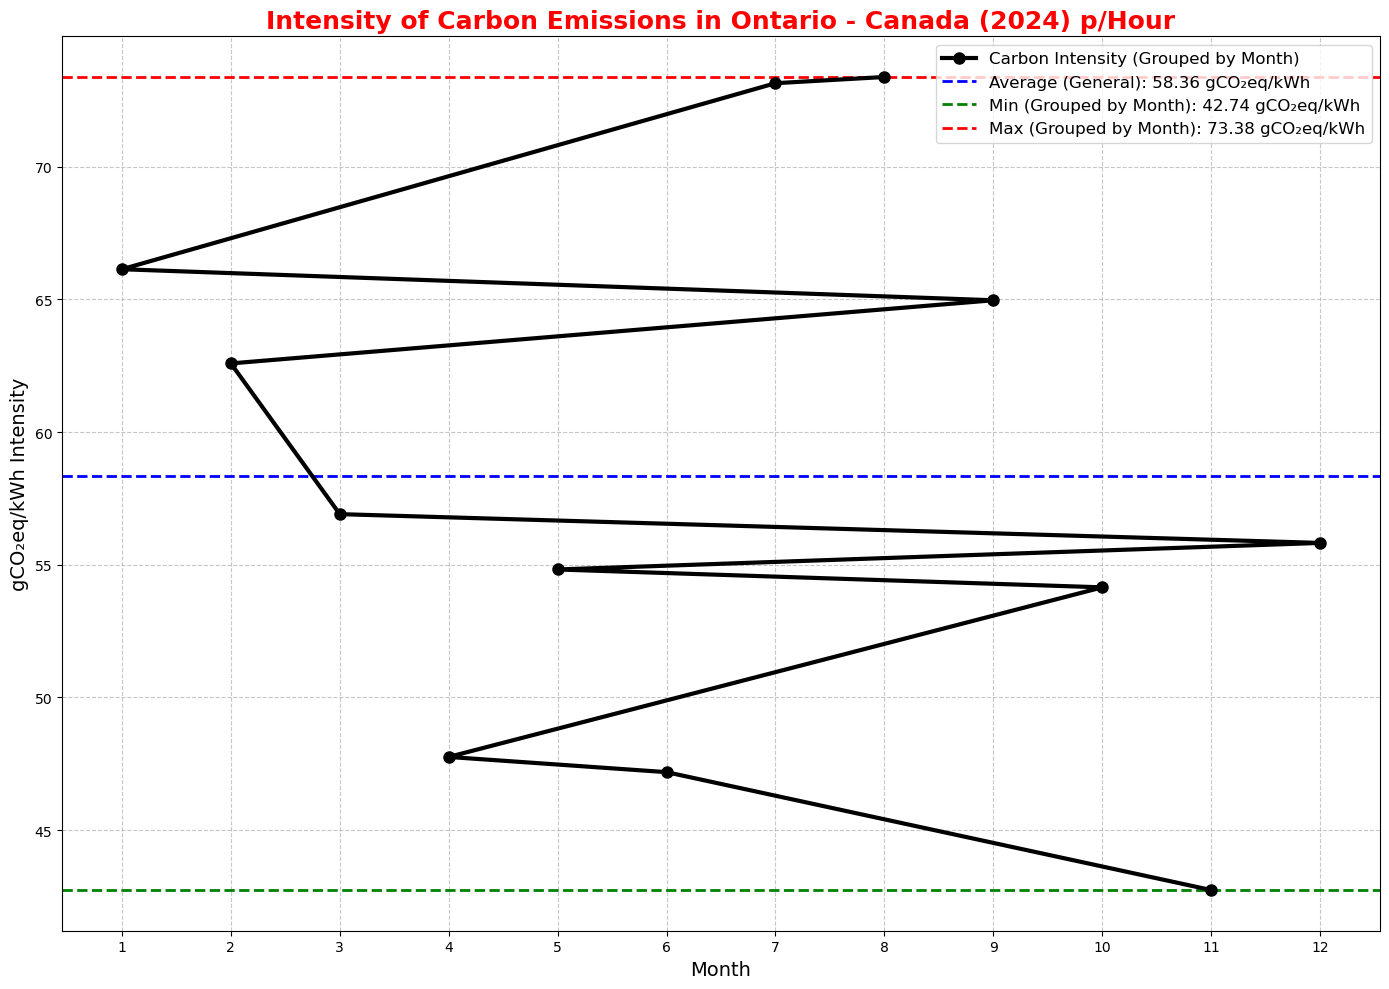

In [144]:
plt.figure(figsize=(14, 10))

plt.plot(df_sorted['Month'], df_sorted['Carbon Intensity gCO₂eq/kWh (direct)'], marker='o', color='black', linestyle='-', linewidth=3, markersize=8, label='Carbon Intensity (Grouped by Month)', zorder=5)

plt.axhline(y=carbon_intensity_general_mean, color='blue', linestyle='--', linewidth=2, label=f'Average (General): {carbon_intensity_general_mean:.2f} gCO₂eq/kWh')
plt.axhline(y=carbon_intensity_min, color='green', linestyle='--', linewidth=2, label=f'Min (Grouped by Month): {carbon_intensity_min:.2f} gCO₂eq/kWh')
plt.axhline(y=carbon_intensity_max, color='red', linestyle='--', linewidth=2, label=f'Max (Grouped by Month): {carbon_intensity_max:.2f} gCO₂eq/kWh')

plt.title('Intensity of Carbon Emissions in Ontario - Canada (2024) p/Hour', fontsize=18, fontweight='bold', color='red')
plt.xlabel('Month', fontsize=14)
plt.ylabel('gCO₂eq/kWh Intensity', fontsize=14)

plt.legend(loc='upper right', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(df_sorted['Month'])
plt.tight_layout()

plt.show()